<a href="https://colab.research.google.com/github/Vaibhav543/Applied_AI/blob/main/Predict_Fradulent_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required modules
import csv
import sqlite3
import pandas as pd



# Connecting to the geeks database
connection = sqlite3.connect('ml.db')

# Creating a cursor object to execute
# SQL queries on a database table
cursor = connection.cursor()

# Table Definition
Create_Transactions = '''CREATE TABLE Transactions(
        TID INTEGER,
        IdOfOrigStudent INTEGER,
        IdOfDestStudent INTEGER,
        transactionType TEXT,
        hourStep INTEGER,
        transaction_device TEXT,
				comments TEXT);
				'''

Create_Students = '''CREATE TABLE Students(
        StudentId INTEGER,
        StudentName TEXT,
        StudentAge INTEGER,
        StudentYear INTEGER,
        TransactionFrequency TEXT,
        NumberOfTransactionsTillDate INTEGER,
        AccountType TEXT);
				'''
Create_Sender= '''CREATE TABLE Sender(
        oldBalanceOfOrigStudent INTEGER,
        newBalanceOfOrigStudent INTEGER,
        transactionAmount INTEGER,
        TID INTEGER);
				'''
Create_Receiver= '''CREATE TABLE Receiver(
        oldBalanceOfDestStudent INTEGER,
        newBalanceOfDestStudent INTEGER,
        transactionAmount INTEGER,
        TID INTEGER);
	'''
Create_Processed_Hacker_Check= '''CREATE TABLE Processed_Hacker_Check(
        TID INTEGER,
        isSuspectedHacker INTEGER,
        isHacker INTEGER);'''

Create_Unprocessed_Hacker_Check='''CREATE TABLE Unprocessed_Hacker_Check(
        TID INTEGER,
        isSuspectedHacker INTEGER);
        '''


# Creating the table into our database. Dont Run again if relation is already created.
cursor.execute(Create_Transactions)
#cursor.execute("DROP TABLE Processed_Hacker_Check")
cursor.execute(Create_Processed_Hacker_Check)
cursor.execute(Create_Students)
cursor.execute(Create_Sender)
cursor.execute(Create_Receiver)
cursor.execute(Create_Unprocessed_Hacker_Check)

##

# Opening the person-records.csv file
Transactions_file = open('/content/drive/MyDrive/ADS_DataSet/Transactions.csv')
#Processed_Hacker_Check_file = open('/content/Processed_Hacker_Check.csv')
Students_file = open('/content/drive/MyDrive/ADS_DataSet/Students.csv')
Sender_file = open('/content/drive/MyDrive/ADS_DataSet/sender.csv')
Receiver_file = open('/content/drive/MyDrive/ADS_DataSet/receiver.csv')



# Reading the contents of the
# person-records.csv file
Transactions_contents = csv.reader(Transactions_file)
#Processed_Hacker_Check_file_contents = csv.reader(Processed_Hacker_Check_file)
Students_contents = csv.reader(Students_file)
Sender_contents = csv.reader(Sender_file)
Receiver_contents = csv.reader(Receiver_file)


# SQL query to insert data into the
# person table
insert_Transactions = "INSERT INTO Transactions (TID, IdOfOrigStudent,IdOfDestStudent,transactionType,hourStep,transaction_device,comments) VALUES(?,?,?,?,?,?,?) "
insert_Processed_Hacker_Check="INSERT INTO Processed_Hacker_Check (TID, isSuspectedHacker,isHacker) VALUES(?,?,?)"
insert_Students="INSERT INTO Students (StudentId, StudentName,StudentAge,StudentYear,TransactionFrequency,NumberOfTransactionsTillDate,AccountType) VALUES(?,?,?,?,?,?,?)"
insert_Sender="INSERT INTO Sender (oldBalanceOfOrigStudent, newBalanceOfOrigStudent,transactionAmount,TID) VALUES(?,?,?,?)"
insert_Receiver="INSERT INTO Receiver (oldBalanceOfDestStudent, newBalanceOfDestStudent,transactionAmount,TID) VALUES(?,?,?,?)"



# Importing the contents of the file
# into our person table
cursor.executemany(insert_Transactions, Transactions_contents)
#cursor.executemany(insert_Processed_Hacker_Check, Processed_Hacker_Check_file_contents)
cursor.executemany(insert_Students, Students_contents)
cursor.executemany(insert_Sender, Sender_contents)
cursor.executemany(insert_Receiver, Receiver_contents)


# SQL query to retrieve all data from
# the person table To verify that the
# data of the csv file has been successfully
# inserted into the table
select_all = "SELECT * FROM Transactions LIMIT 5"
rows = cursor.execute(select_all).fetchall()

# Output to the console screen
for r in rows:
	print(r)

# Committing the changes
connection.commit()

# closing the database connection
#connection.close()


('TID', 'IdOfOrigStudent', 'IdOfDestStudent', 'transactionType', 'hourStep', 'transaction_device', 'comments')
(2599764, 'C1218556612', 'M1579714126', 'money payment', 373, 'Net Banking', 'Done at super market.')
(1476902, 'C1449172216', 'C639646553', 'cash outflow', 353, 'ATM card', 'eatables')
(2537234, 'C603557670', 'M324744640', 'money payment', 8, 'Check', 'Purchased groceries')
(1868301, 'C1336875098', 'C1698810627', 'cash outflow', 346, 'Net Banking', 'Purchased groceries')


In [2]:
import openpyxl

insert_Processed_Hacker_Check="INSERT INTO Processed_Hacker_Check (TID, isSuspectedHacker,isHacker) VALUES(?,?,?)"
insert_Unprocessed_Hacker_Check="INSERT INTO Unprocessed_Hacker_Check (TID, isSuspectedHacker) VALUES(?,?)"



def importExcelWorkBookIntoDB(worksheetPath,insertQuery,columnCount):
    """ Test for case study 1. """
    # Open the database connection and the Excel file
    with sqlite3.connect('ml.db', timeout=20) as db:
        cursor = db.cursor()
        #cursor.execute("DROP TABLE Processed_Hacker_Check")
        #cursor.execute(Create_Processed_Hacker_Check_)
        ##db.commit()

        ##workbook=openpyxl.load_workbook('/content/drive/MyDrive/ADS_DataSet/Processed_Hacker_Check.xlsx')
        workbook=openpyxl.load_workbook(worksheetPath)
        # Access a specific sheet by name
        sheet = workbook['Sheet1']
        ##insert_Processed_Hacker_Check="INSERT INTO Processed_Hacker_Check (TID, isSuspectedHacker,isHacker) VALUES(?,?,?)"


        # Clear the database
        #db.execute('DELETE FROM albums;')

        # Load data from each Excel sheet into the database
        # Iterate through rows and columns to read data
        for row in sheet.iter_rows(values_only=True):
         try:
              if columnCount==3:
               cursor.execute(insert_Processed_Hacker_Check, (str(row[0]),str(row[1]),str(row[2])))
              elif columnCount==2:
               cursor.execute(insert_Unprocessed_Hacker_Check, (str(row[0]),str(row[1])))

              #cursor.execute(insert_Processed_Hacker_Check, row[0]),str(row[1]),str(row[2])))
              #cursor.executemany(insertQuery,sheet.iter_rows())
         except sqlite3.Error as e:
                print(e)
                db.rollback()

        db.commit()



importExcelWorkBookIntoDB("/content/drive/MyDrive/ADS_DataSet/Processed_Hacker_Check.xlsx",insert_Processed_Hacker_Check,3)
importExcelWorkBookIntoDB("/content/drive/MyDrive/ADS_DataSet/Unprocessed_Hacker_Check.xlsx",insert_Unprocessed_Hacker_Check,2)



In [3]:
# Check if all data have been loaded
select_stmt = 'SELECT COUNT(*) FROM Unprocessed_Hacker_Check'
for row in cursor.execute(select_stmt).fetchall():
   print(row)

(419432,)


In [ ]:
"""
import openpyxl


Create_Processed_Hacker_Check_= '''CREATE TABLE Processed_Hacker_Check(
        TID INTEGER,
        isSuspectedHacker INTEGER,
        isHacker INTEGER);'''




def case_study_1():
    # Test for case study 1.
    # Open the database connection and the Excel file
    with sqlite3.connect('ml.db', timeout=20) as db:
        cursor = db.cursor()
        #cursor.execute("DROP TABLE Processed_Hacker_Check")
        cursor.execute(Create_Processed_Hacker_Check_)
        db.commit()

        workbook=openpyxl.load_workbook('/content/drive/MyDrive/ADS_DataSet/Processed_Hacker_Check.xlsx')
        #workbook=openpyxl.load_workbook(worksheetPath)
        # Access a specific sheet by name
        sheet = workbook['Sheet1']

        insert_Processed_Hacker_Check="INSERT INTO Processed_Hacker_Check (TID, isSuspectedHacker,isHacker) VALUES(?,?,?)"


        # Clear the database
        #db.execute('DELETE FROM albums;')

        # Load data from each Excel sheet into the database
        # Iterate through rows and columns to read data
        for row in sheet.iter_rows(values_only=True):
         try:
              cursor.execute(insert_Processed_Hacker_Check, (str(row[0]),str(row[1]),str(row[2])))
              #cursor.execute(insert_Processed_Hacker_Check, row[0]),str(row[1]),str(row[2])))

         except sqlite3.Error as e:
                print(e)
                db.rollback()

        db.commit()

        # Check if all data have been loaded
        select_stmt = 'SELECT * FROM Processed_Hacker_Check LIMIT 5'
        for row in cursor.execute(select_stmt).fetchall():
            print(row)

case_study_1()
"""

In [3]:
#SELECT Transactions.TID,IdOfOrigStudent,IdOfDestStudent,hourStep,transaction_device,comments,oldBalanceOfOrigStudent,newBalanceOfOrigStudent,oldBalanceOfDestStudent,newBalanceOfDestStudent	,receiver.transactionAmount ,isSuspectedHacker,isHacker

display = pd.read_sql_query("""
SELECT Transactions.TID,IdOfOrigStudent,IdOfDestStudent,hourStep,transaction_device,comments,oldBalanceOfOrigStudent,newBalanceOfOrigStudent,oldBalanceOfDestStudent,newBalanceOfDestStudent,receiver.transactionAmount ,OrigStud.StudentAge as OriginStudentAge,OrigStud.TransactionFrequency as OriginStudentTransactionFrequency,OrigStud.NumberOfTransactionsTillDate as OriginStudentNumberOfTransactionsTillDate,OrigStud.AccountType as OriginStudentAccountType,DestStud.StudentAge as DestStudentAge,DestStud.TransactionFrequency as DestStudentTransactionFrequency,DestStud.NumberOfTransactionsTillDate as DestStudentNumberOfTransactionsTillDate,DestStud.AccountType as DestStudentAccountType,isSuspectedHacker,isHacker
FROM Transactions
JOIN sender on sender.TID=Transactions.TID
JOIN receiver on receiver.TID=Transactions.TID
JOIN Processed_Hacker_Check on Processed_Hacker_Check.TID=Transactions.TID
JOIN Students as OrigStud on OrigStud.StudentId=Transactions.IdOfOrigStudent
JOIN Students as DestStud on DestStud.StudentId=Transactions.IdOfDestStudent""", connection)
display

TID IdOfOrigStudent IdOfDestStudent  hourStep transaction_device  \
0       1476902     C1449172216      C639646553       353           ATM card   
1       1868301     C1336875098     C1698810627       346        Net Banking   
2       1973556     C1183135461     C1446253105       212        Net Banking   
3       1457141     C1746137000     C1395399172       395                UPI   
4       1812489      C373195933     M1138355967       351                UPI   
...         ...             ...             ...       ...                ...   
337185  1679591     C2095509776      M131516104        36                UPI   
337186  1881328      C533595859      C398309906       203              Check   
337187  1419158     C1688335786      C813595485        39        Net Banking   
337188  1969157     C1131264378     M1514031036       590              Check   
337189  2061626     C1231219227      C866900710        16           ATM card   

                     comments  oldBalanceOfOrigStudent  \
0                    eatables                     0.00   
1         Purchased groceries                     0.00   
2                      dinner                704328.29   
3        purchased stationary               2832290.64   
4                        loan                 49548.00   
...                       ...                      ...   
337185           laundry rent                     0.00   
337186                 drinks                     0.00   
337187  Done at super market.                526295.18   
337188               eatables                     0.00   
337189                  lunch              23161710.30   

        newBalanceOfOrigStudent  oldBalanceOfDestStudent  \
0                          0.00               3296742.37   
1                          0.00                797853.30   
2                          0.00                     0.00   
3                    3097986.44                323965.22   
4                      22737.20                     0.00   
...                         ...                      ...   
337185                     0.00                     0.00   
337186                     0.00                 88010.02   
337187                356310.87                324730.77   
337188                     0.00                     0.00   
337189              23243411.64                183143.81   

        newBalanceOfDestStudent  ...  OriginStudentAge  \
0                    3500400.55  ...                20   
1                    1000068.54  ...                27   
2                          0.00  ...                29   
3                      58269.42  ...                13   
4                          0.00  ...                10   
...                         ...  ...               ...   
337185                     0.00  ...                22   
337186                124847.09  ...                22   
337187                494715.08  ...                13   
337188                     0.00  ...                15   
337189                181921.35  ...                22   

        OriginStudentTransactionFrequency  \
0                                     LOW   
1                                  MEDIUM   
2                                    HIGH   
3                                  MEDIUM   
4                                  MEDIUM   
...                                   ...   
337185                             MEDIUM   
337186                                LOW   
337187                                LOW   
337188                                LOW   
337189                               HIGH   

       OriginStudentNumberOfTransactionsTillDate  OriginStudentAccountType  \
0                                            426              JOINT/SHARED   
1                                            582                INDIVIDUAL   
2                                            209              JOINT/SHARED   
3                                            909                INDIVIDUAL   
4    

In [4]:
#display=display.drop("isSuspectedHacker",axis=1)

#display.drop(index=0,inplace=True)
#display.drop(display[display['TID'].is].index,inplace=True)

print(display.shape)


(337190, 21)


In [5]:

# save the labels into a variable l.
#label = pd.DataFrame(display['isHacker'],columns=('isHacker'))
#label=pd.read_sql_query("""Select  isHacker FROM Transactions
#JOIN Processed_Hacker_Check on Processed_Hacker_Check.TID=Transactions.TID""", connection)
# Drop the label feature and store the pixel data in d.
data = display.drop("isHacker",axis=1)
label=display.filter(["isHacker"], axis=1)
print(data.shape)
print(label.shape)
#label.drop(index=0,inplace=True)

(337190, 20)
(337190, 1)


In [6]:
print(display.dtypes)

TID                                            int64
IdOfOrigStudent                               object
IdOfDestStudent                               object
hourStep                                       int64
transaction_device                            object
comments                                      object
oldBalanceOfOrigStudent                      float64
newBalanceOfOrigStudent                      float64
oldBalanceOfDestStudent                      float64
newBalanceOfDestStudent                      float64
transactionAmount                            float64
OriginStudentAge                               int64
OriginStudentTransactionFrequency             object
OriginStudentNumberOfTransactionsTillDate      int64
OriginStudentAccountType                      object
DestStudentAge                                 int64
DestStudentTransactionFrequency               object
DestStudentNumberOfTransactionsTillDate        int64
DestStudentAccountType                        

In [7]:

print(display.columns)
print("**********************************************************************************************")
print(display.nunique())
print("***********************************************************************************************")
print(display['isHacker'].value_counts())


#This is a highly imbalanced dataset as the number of data points for Hacked Transactions are very less.

Index(['TID', 'IdOfOrigStudent', 'IdOfDestStudent', 'hourStep',
       'transaction_device', 'comments', 'oldBalanceOfOrigStudent',
       'newBalanceOfOrigStudent', 'oldBalanceOfDestStudent',
       'newBalanceOfDestStudent', 'transactionAmount', 'OriginStudentAge',
       'OriginStudentTransactionFrequency',
       'OriginStudentNumberOfTransactionsTillDate', 'OriginStudentAccountType',
       'DestStudentAge', 'DestStudentTransactionFrequency',
       'DestStudentNumberOfTransactionsTillDate', 'DestStudentAccountType',
       'isSuspectedHacker', 'isHacker'],
      dtype='object')
**********************************************************************************************
TID                                          337190
IdOfOrigStudent                              305506
IdOfDestStudent                              244653
hourStep                                        708
transaction_device                                4
comments                                         13
ol

In [8]:
display.isnull().sum()

TID                                          0
IdOfOrigStudent                              0
IdOfDestStudent                              0
hourStep                                     0
transaction_device                           0
comments                                     0
oldBalanceOfOrigStudent                      0
newBalanceOfOrigStudent                      0
oldBalanceOfDestStudent                      0
newBalanceOfDestStudent                      0
transactionAmount                            0
OriginStudentAge                             0
OriginStudentTransactionFrequency            0
OriginStudentNumberOfTransactionsTillDate    0
OriginStudentAccountType                     0
DestStudentAge                               0
DestStudentTransactionFrequency              0
DestStudentNumberOfTransactionsTillDate      0
DestStudentAccountType                       0
isSuspectedHacker                            0
isHacker                                     0
dtype: int64

In [9]:
numerical_attributes = display.select_dtypes(exclude='object')
categorical_attributes = display.select_dtypes(include='object')

describe = numerical_attributes.describe()

describe

TID       hourStep  oldBalanceOfOrigStudent  \
count  3.371900e+05  337190.000000             3.371900e+05   
mean   1.745262e+06     244.105614             9.099317e+05   
std    1.989359e+05     143.162522             3.005166e+06   
min    1.400834e+06       1.000000             0.000000e+00   
25%    1.572508e+06     156.000000             0.000000e+00   
50%    1.745350e+06     240.000000             1.658232e+04   
75%    1.917782e+06     336.000000             1.287140e+05   
max    2.090144e+06     743.000000             5.039905e+07   

       newBalanceOfOrigStudent  oldBalanceOfDestStudent  \
count             3.371900e+05             3.371900e+05   
mean              9.298745e+05             1.046370e+06   
std               3.035718e+06             3.394481e+06   
min               0.000000e+00             0.000000e+00   
25%               0.000000e+00             0.000000e+00   
50%               0.000000e+00             8.523935e+04   
75%               1.791346e+05             8.609687e+05   
max               4.039905e+07             3.555534e+08   

       newBalanceOfDestStudent  transactionAmount  OriginStudentAge  \
count             3.371900e+05       3.371900e+05     337190.000000   
mean              1.151664e+06       1.714482e+05         19.504629   
std               3.617401e+06       5.645841e+05          5.760074   
min               0.000000e+00       0.000000e+00         10.000000   
25%               0.000000e+00       1.203223e+04         15.000000   
50%               1.511457e+05       6.409780e+04         20.000000   
75%               1.003902e+06       1.997636e+05         24.000000   
max               3.553814e+08       4.846478e+07         29.000000   

       OriginStudentNumberOfTransactionsTillDate  DestStudentAge  \
count                              337190.000000   337190.000000   
mean                                  498.238082       19.504517   
std                                   288.761763        5.771388   
min                                     0.000000       10.000000   
25%                                   248.000000       14.000000   
50%                                   498.000000       20.000000   
75%                                   748.000000       25.000000   
max                                   999.000000       29.000000   

       DestStudentNumberOfTransactionsTillDate  isSuspectedHacker  \
count                            337190.000000      337190.000000   
mean                                498.724494           0.000003   
std                                 288.651745           0.001722   
min                                   0.000000           0.000000   
25%                                 248.000000           0.000000   
50%                                 499.000000           0.000000   
75%                                 749.000000           0.000000   
max                                 999.000000           1.000000   

            isHacker  
count  337190.000000  
mean        0.005549  
std         0.074283  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [10]:
describe = categorical_attributes.describe()

describe

IdOfOrigStudent IdOfDestStudent transaction_device comments  \
count           337190          337190             337190   337190   
unique          305506          244653                  4       13   
top        C2146239655      C991363637           ATM card   dinner   
freq                 5              16              84472    26388   

       OriginStudentTransactionFrequency OriginStudentAccountType  \
count                             337190                   337190   
unique                                 3                        2   
top                               MEDIUM               INDIVIDUAL   
freq                              112592                   168964   

       DestStudentTransactionFrequency DestStudentAccountType  
count                           337190                 337190  
unique                               3                      2  
top                             MEDIUM           JOINT/SHARED  
freq                            112818                 169055

1.   Here we can see that majority of payments are done via ATM Card & for dinner purpose.
2.   Also there is lot variability we can see in the some columns so applying one-hot encoding on those columns can vastly increase dimensionality of our data & subsequently model processing time.
3.From the Above data we can observe that more students are sending money than the receiving.





/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

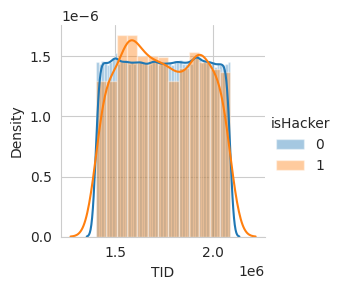

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


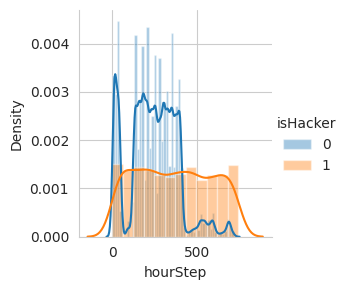

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


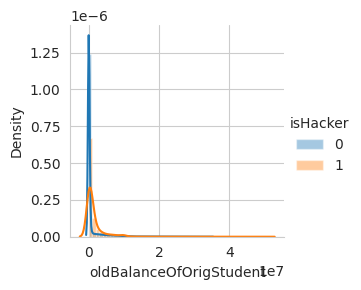

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


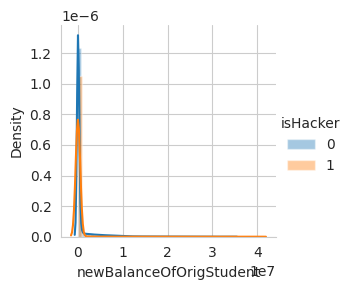

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


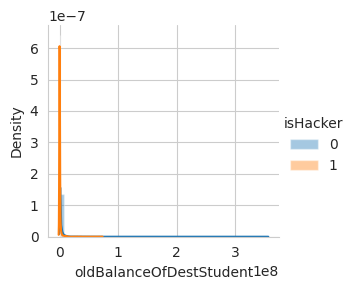

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


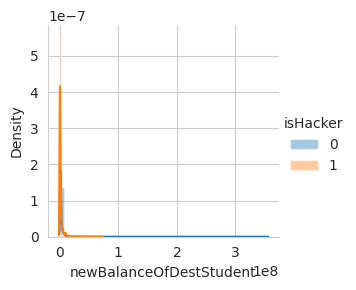

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


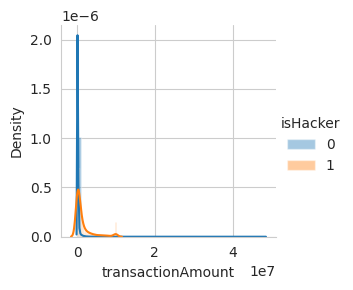

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


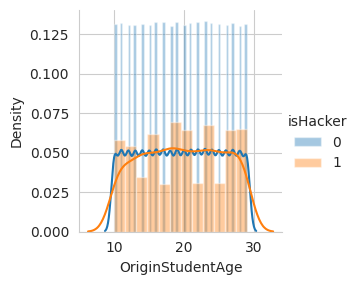

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


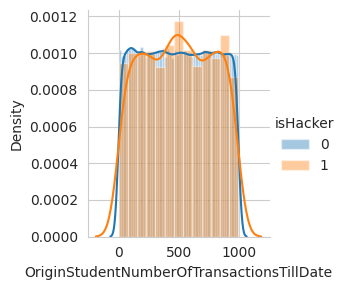

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


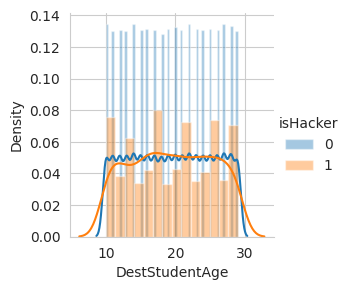

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


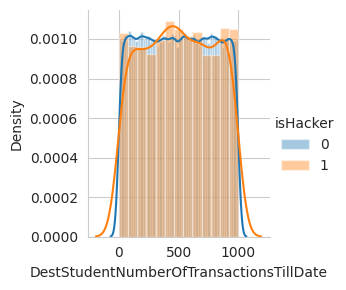

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an 

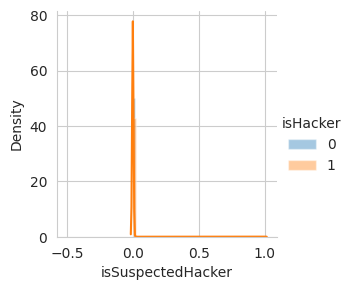

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an 

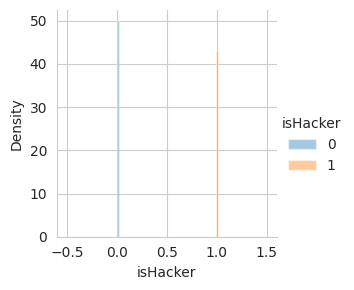

In [42]:
#Probabilty Density Function

plt.figure(1)

for column in  numerical_attributes.columns.tolist():
     g1=sn.FacetGrid(display,hue="isHacker")
     g1.map(sn.distplot,column)
     g1.add_legend()
     plt.show()



In [ ]:
# Data-preprocessing: Standardizing the data
#We Use ordinal encoding for categorical variables that have a natural rank ordering.
#Also we use one-hot encoding for categorical variables that do not have a natural rank ordering.
#ordinal variable has values can be naturally ordered or ranked.
#The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship.
#A one-hot encoding is appropriate for categorical data where no relationship exists between categories
#Ordinal encoding appropriate if there is a known relationship between the categories.
'''
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

data["transaction_device"]=labelencoder.fit_transform(data["transaction_device"])
data["comments"]=labelencoder.fit_transform(data["comments"])
data["IdOfOrigStudent"]=labelencoder.fit_transform(data["IdOfOrigStudent"])
data["IdOfDestStudent"]=labelencoder.fit_transform(data["IdOfDestStudent"])


#numeric_data=display.drop(['IdOfOrigStudent','IdOfDestStudent'],axis=1)

print(data.shape)
print(data.columns)
'''

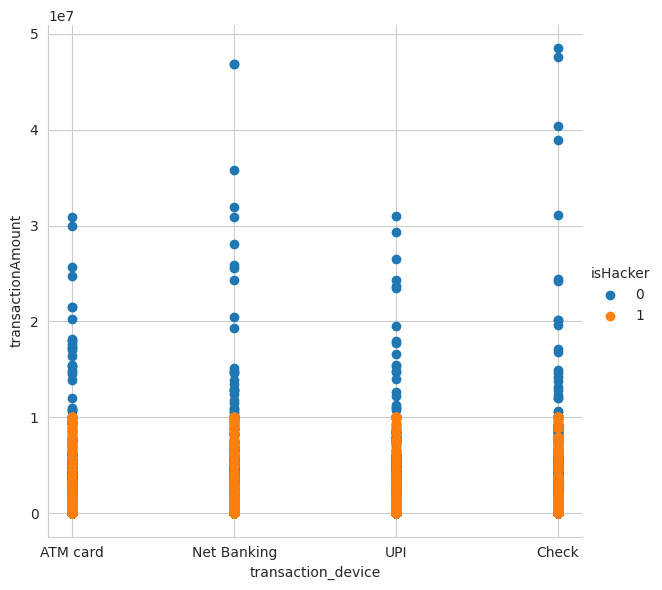

In [19]:
# 2-D Scatter plot with color-coding for each class.
# Here 'sns' corresponds to seaborn.
import seaborn as sn
import matplotlib.pyplot as plt

sn.set_style("whitegrid");
sn.FacetGrid(display, hue="isHacker",height=6) \
   .map(plt.scatter, "transaction_device", "transactionAmount") \
   .add_legend();
plt.show();

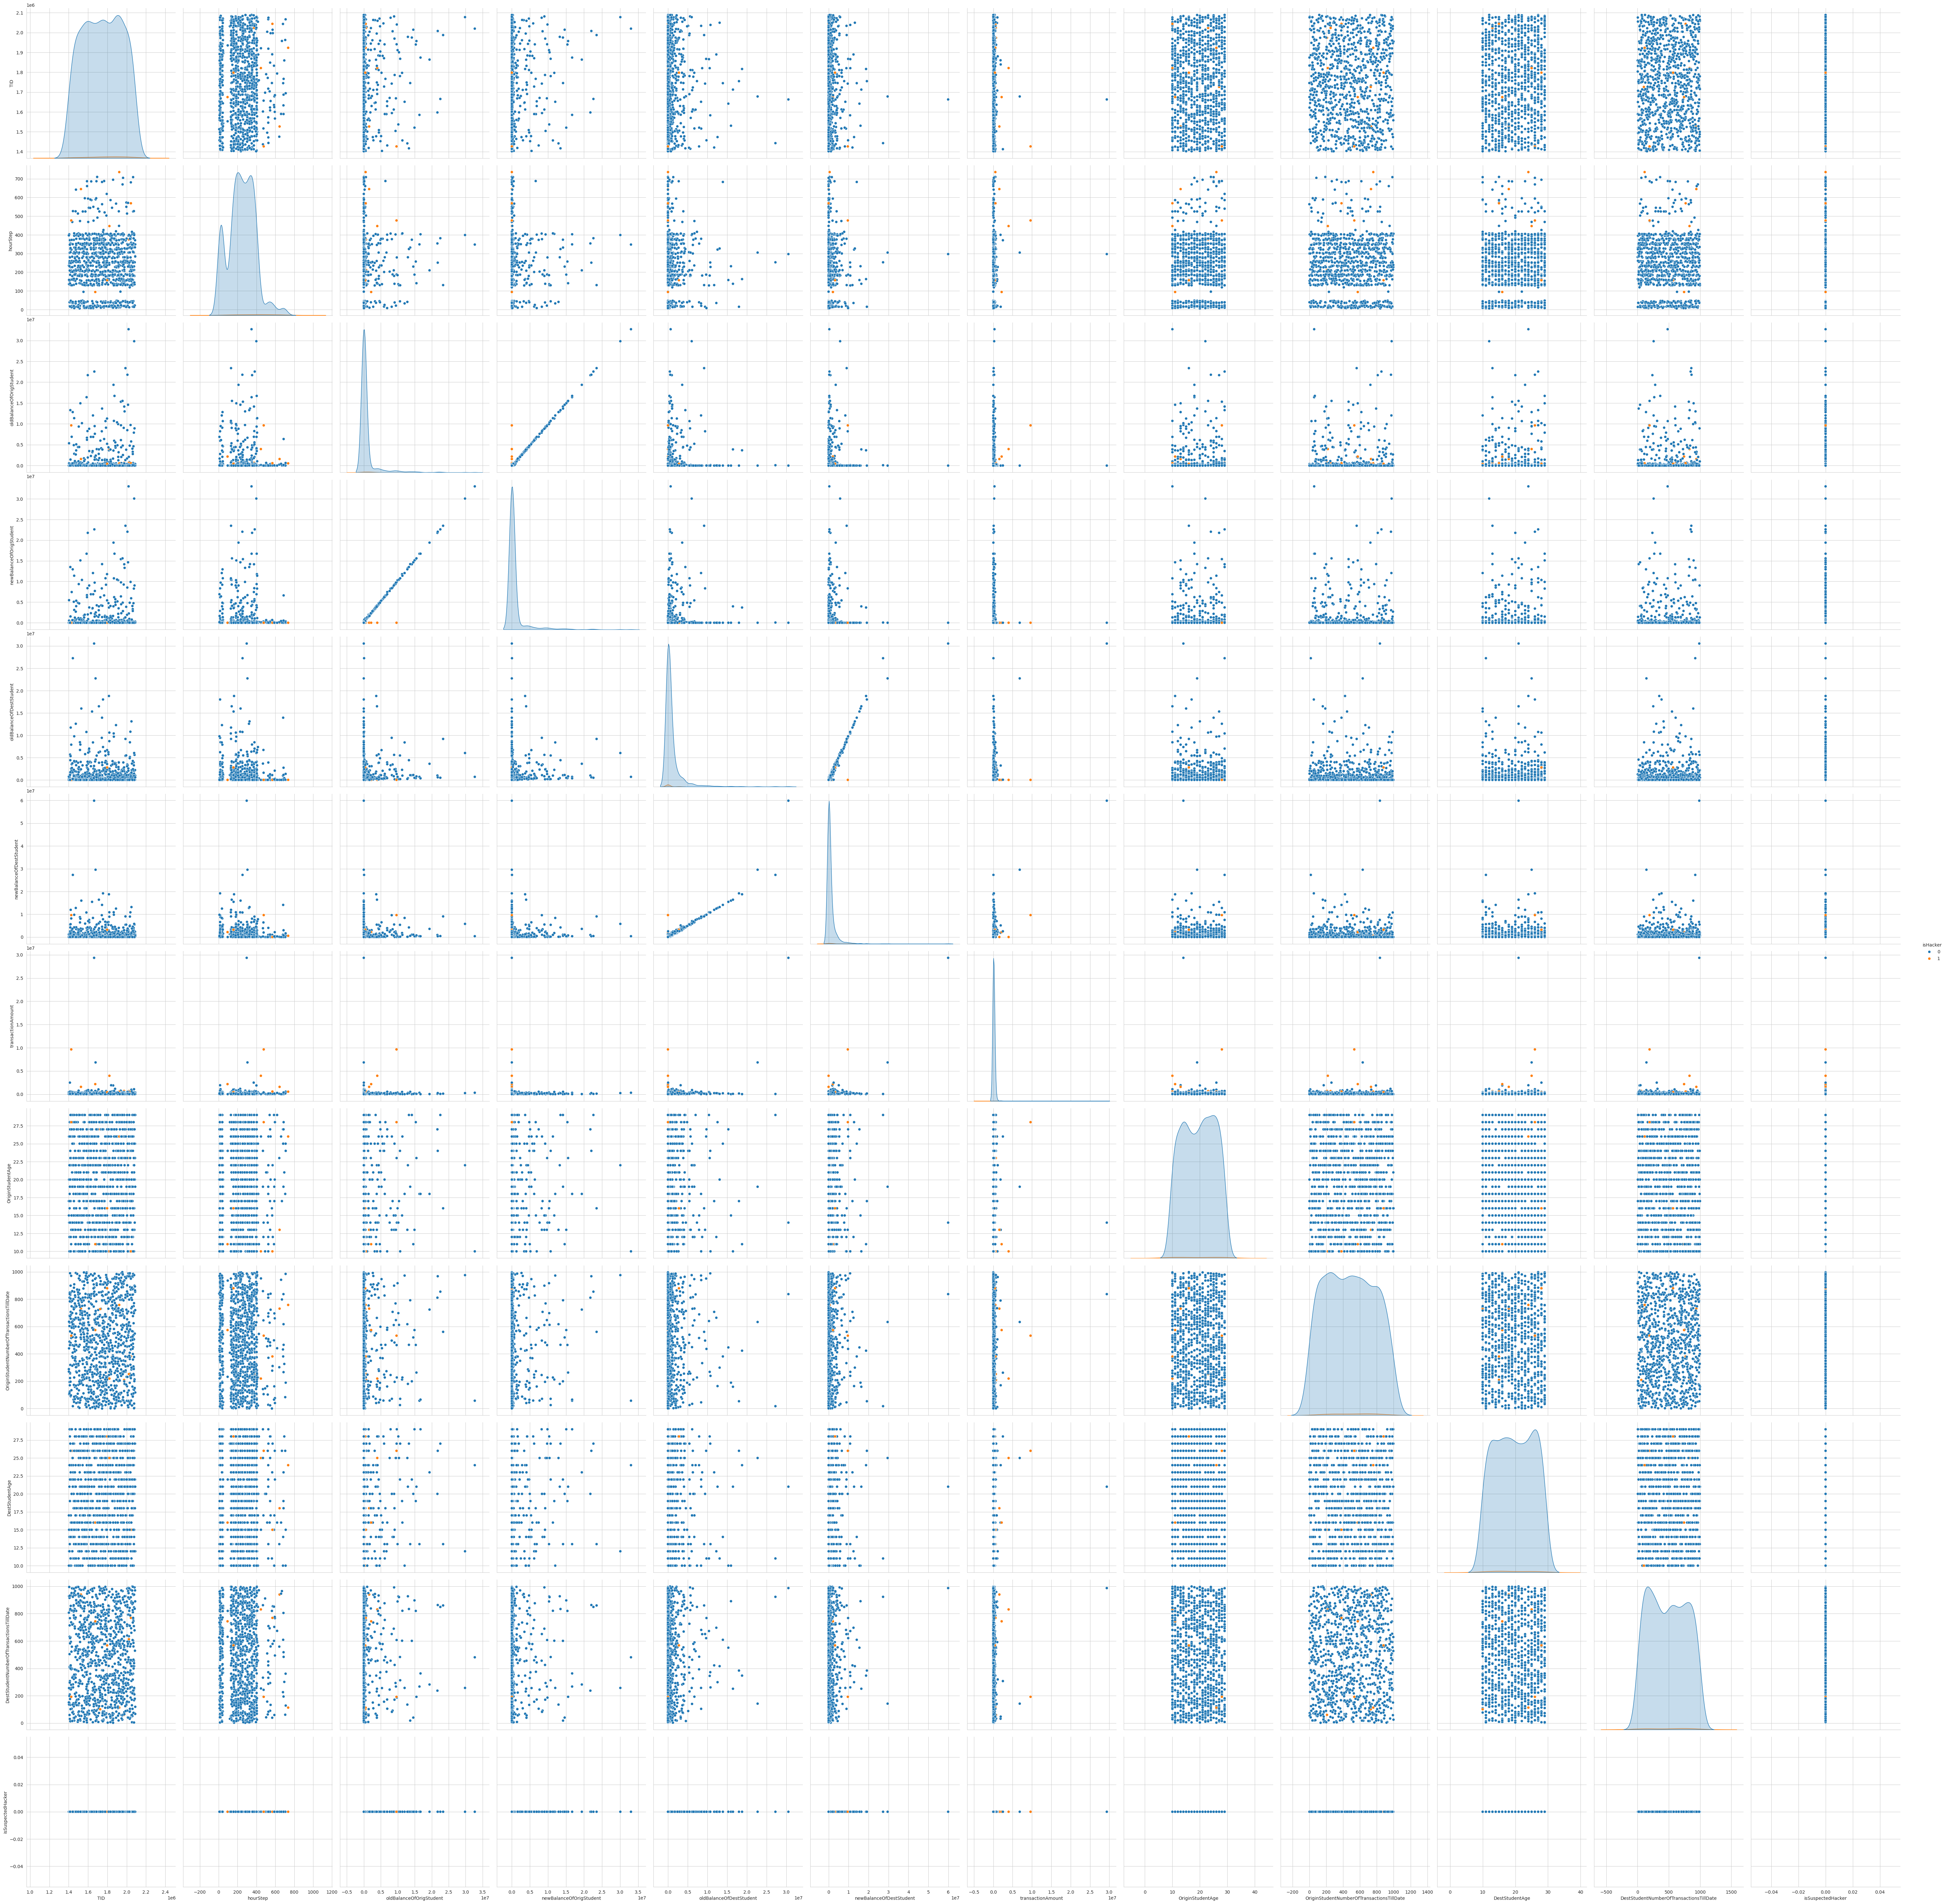

In [22]:
#Pair Plot #Takes lots of time to run
sn.set_style("whitegrid");
sn.pairplot(display.iloc[:1000,:], hue="isHacker", height=5);
plt.show()

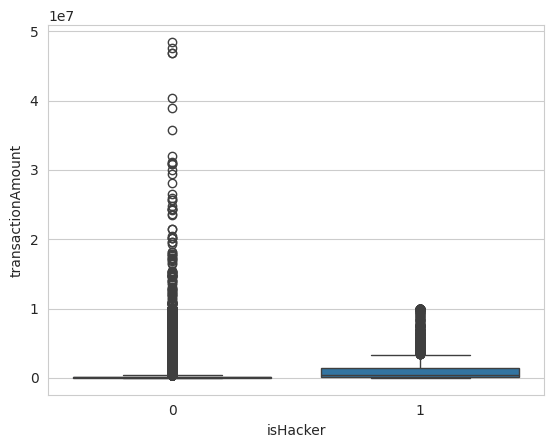

In [43]:
#Box-plot with whiskers: It is another method of visualizing the  1-D scatter plot more intuitivey.
sn.boxplot(x='isHacker',y='transactionAmount', data=display)
plt.show()


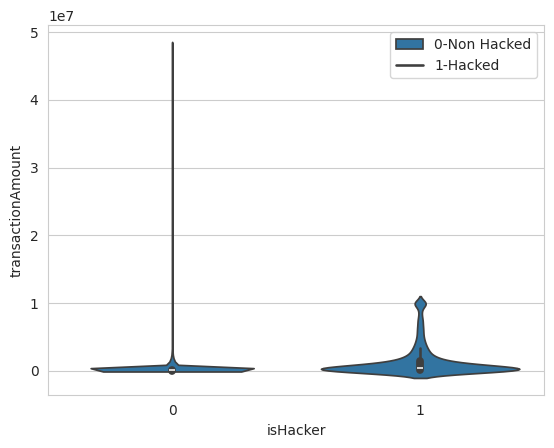

In [50]:
#In Violin Plot, Denser regions of the data are fatter, and sparser ones thinner
#Violin plot

sn.violinplot(x="isHacker", y="transactionAmount", data=display)
plt.legend(["0-Non Hacked","1-Hacked"])
plt.show()

0    335319
1      1871
Name: isHacker, dtype: int64


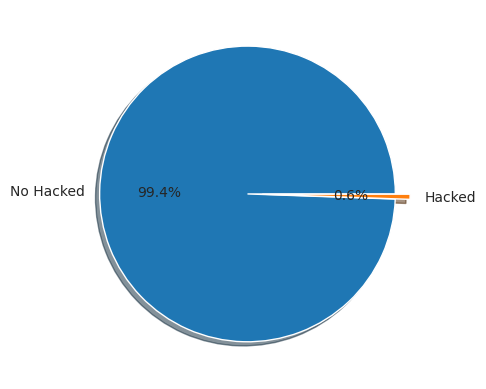

In [53]:
# value count
print(display.isHacker.value_counts())

# pie plot for the value count
plt.pie(display.isHacker.value_counts(),explode=[0.1, 0],
        labels=['No Hacked', 'Hacked'], shadow=True, autopct='%1.1f%%')
plt.show()

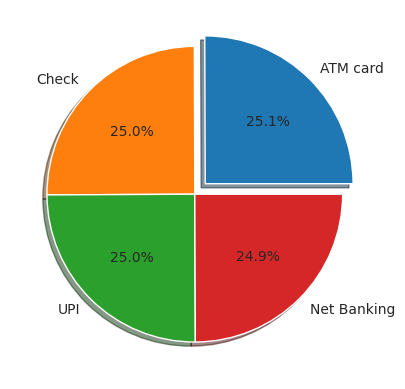

In [65]:
values = display['transaction_device'].value_counts().values
labels = display['transaction_device'].value_counts().keys()

plt.pie(values, labels=labels, explode=[0.1,0,0,0], shadow=True, autopct='%1.1f%%')
plt.show()

In [12]:
'''
# difference between initial balance before the transaction and new balance after the transaction for the Origin Student
data['balanceChangeOrig'] = data['newBalanceOfOrigStudent'] - data['oldBalanceOfOrigStudent']

# difference between initial balance before the transaction and new balance after the transaction for the Destination Student
data['balanceChangeDest'] = data['newBalanceOfDestStudent'] - data['oldBalanceOfDestStudent']
'''

In [13]:
"""
#Dropping some columns from the Dataframe since it does not add any valued information for prediction of fradulent transaction.
'''['TID', 'IdOfOrigStudent', 'IdOfDestStudent', 'hourStep',
       'transaction_device', 'comments', 'oldBalanceOfOrigStudent',
       'newBalanceOfOrigStudent', 'oldBalanceOfDestStudent',
       'newBalanceOfDestStudent', 'transactionAmount', 'OriginStudentAge',
       'OriginStudentTransactionFrequency',
       'OriginStudentNumberOfTransactionsTillDate', 'OriginStudentAccountType',
       'DestStudentAge', 'DestStudentTransactionFrequency',
       'DestStudentNumberOfTransactionsTillDate', 'DestStudentAccountType',
       'isSuspectedHacker', 'isHacker']'''
data=data.drop(['oldBalanceOfOrigStudent','newBalanceOfOrigStudent','oldBalanceOfDestStudent','newBalanceOfDestStudent','TID','IdOfOrigStudent','IdOfDestStudent','hourStep'],axis=1)
Y=label

print(data.shape)
print(Y.shape)
print(data.columns)
"""

(337190, 14)
(337190, 1)
Index(['transaction_device', 'comments', 'transactionAmount',
       'OriginStudentAge', 'OriginStudentTransactionFrequency',
       'OriginStudentNumberOfTransactionsTillDate', 'OriginStudentAccountType',
       'DestStudentAge', 'DestStudentTransactionFrequency',
       'DestStudentNumberOfTransactionsTillDate', 'DestStudentAccountType',
       'isSuspectedHacker', 'balanceChangeOrig', 'balanceChangeDest'],
      dtype='object')


In [ ]:
"""
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

onehot_encoder = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()
#X = onehot_encoder.fit_transform(X)
#t=onehot_encoder.fit_transform(X['transaction_device'].to_numpy().reshape(-1,1))
#X = pd.get_dummies(data, columns = ['transaction_device', 'comments','OriginStudentTransactionFrequency','OriginStudentAccountType','DestStudentTransactionFrequency','DestStudentAccountType'])
X = pd.get_dummies(data, columns = ['transaction_device', 'comments','OriginStudentAccountType','DestStudentAccountType'])
X["OriginStudentTransactionFrequency"]=ordinal_encoder.fit_transform(X["OriginStudentTransactionFrequency"].to_numpy().reshape(-1,1))
X["DestStudentTransactionFrequency"]=ordinal_encoder.fit_transform(X["DestStudentTransactionFrequency"].to_numpy().reshape(-1,1))


print(X.shape)
X
"""

In [41]:
#print(X.columns)

(50000, 31)
(50000, 1)


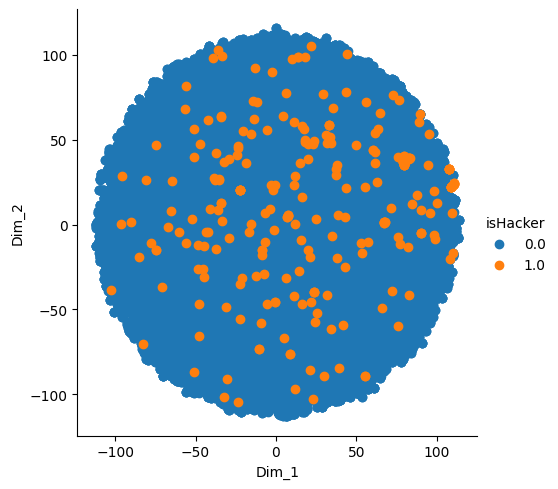

In [27]:
# TSNE for data visulization

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

X_15K=X.iloc[:50000]
label_15K=label.iloc[:50000]

standardized_data = StandardScaler().fit_transform(X_15K)
print(standardized_data.shape)
print(label_15K.shape)
#print(label_1000.columns)



model = TSNE(n_components=2,random_state=0,perplexity=2,n_iter=1000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(standardized_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.hstack((tsne_data, label_15K))
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "isHacker"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df,hue="isHacker", height=5).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [11]:
#Unprocessed_Hacker_Rank Dataset
Validation_Dataset=pd.read_sql_query("""
SELECT Transactions.TID,IdOfOrigStudent,IdOfDestStudent,hourStep,transaction_device,comments,oldBalanceOfOrigStudent,newBalanceOfOrigStudent,oldBalanceOfDestStudent,newBalanceOfDestStudent,receiver.transactionAmount ,OrigStud.StudentAge as OriginStudentAge,OrigStud.TransactionFrequency as OriginStudentTransactionFrequency,OrigStud.NumberOfTransactionsTillDate as OriginStudentNumberOfTransactionsTillDate,OrigStud.AccountType as OriginStudentAccountType,DestStud.StudentAge as DestStudentAge,DestStud.TransactionFrequency as DestStudentTransactionFrequency,DestStud.NumberOfTransactionsTillDate as DestStudentNumberOfTransactionsTillDate,DestStud.AccountType as DestStudentAccountType,isSuspectedHacker
FROM Transactions
JOIN sender on sender.TID=Transactions.TID
JOIN receiver on receiver.TID=Transactions.TID
JOIN Unprocessed_Hacker_Check on Unprocessed_Hacker_Check.TID=Transactions.TID
JOIN Students as OrigStud on OrigStud.StudentId=Transactions.IdOfOrigStudent
JOIN Students as DestStud on DestStud.StudentId=Transactions.IdOfDestStudent""", connection)

Validation_Dataset

TID IdOfOrigStudent IdOfDestStudent  hourStep transaction_device  \
0       2444052      C743369792     C1271835801        43        Net Banking   
1       2208140     C1786245260      C148647651       212              Check   
2       2243690     C1137249776      C376608331       252              Check   
3       2165645     C1941110130      C248626167       154           ATM card   
4       2164157     C1752260304       C91966766       184                UPI   
...         ...             ...             ...       ...                ...   
225144  2498404      C356912595      M946404287       429        Net Banking   
225145  2343147      C949131461      C306247370       379                UPI   
225146  2264333     C1443083055     C1496047001       302           ATM card   
225147  2519859     C1517307437     M1052074467       133           ATM card   
225148  2525928     C1172470755     C1380463436       301              Check   

                     comments  oldBalanceOfOrigStudent  \
0                   room rent                 25620.42   
1                      drinks               7316396.52   
2       Done at super market.               5444391.76   
3                    eatables                240039.00   
4        purchased stationary              26054610.11   
...                       ...                      ...   
225144  Done at super market.                 10364.00   
225145  Done at super market.                 43407.00   
225146    Purchased groceries                 19853.00   
225147                betting                 80473.64   
225148    Purchased groceries                   433.00   

        newBalanceOfOrigStudent  oldBalanceOfDestStudent  \
0                          0.00               8353078.40   
1                    7422737.76               1937997.00   
2                    5829251.33               9321532.75   
3                          0.00                199850.16   
4                   26161648.47               1403691.92   
...                         ...                      ...   
225144                  6055.13                     0.00   
225145                 28375.25                892818.09   
225146                131375.16                     0.00   
225147                 74507.12                     0.00   
225148                263184.80                  3098.71   

        newBalanceOfDestStudent  transactionAmount  OriginStudentAge  \
0                    8394485.89           41407.49                23   
1                    1831655.75          106341.24                11   
2                    8936673.17          384859.58                12   
3                     904780.05          704929.90                29   
4                    1296653.56          107038.36                13   
...                         ...                ...               ...   
225144                     0.00            4308.87                14   
225145                907849.84           15031.75                29   
225146                     0.00          111522.16                17   
225147                     0.00            5966.51                16   
225148                     0.00          262751.80                19   

       OriginStudentTransactionFrequency  \
0                                    LOW   
1                                   HIGH   
2                                    LOW   
3                                    LOW   
4                                   HIGH   
...                                  ...   
225144                              HIGH   
225145                               LOW   
225146                               LOW   
225147                            MEDIUM   
225148                              HIGH   

        OriginStudentNumberOfTransactionsTillDate OriginStudentAccountType  \
0                                             369               INDIVIDUAL   
1                                             660               INDIVIDUAL   
2    

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler


def pre_processing(data):
  # difference between initial balance before the transaction and new balance after the transaction for the Origin Student
  data['balanceChangeOrig'] = data['newBalanceOfOrigStudent'] - data['oldBalanceOfOrigStudent']

  # difference between initial balance before the transaction and new balance after the transaction for the Destination Student
  data['balanceChangeDest'] = data['newBalanceOfDestStudent'] - data['oldBalanceOfDestStudent']

  data=data.drop(['oldBalanceOfOrigStudent','newBalanceOfOrigStudent','oldBalanceOfDestStudent','newBalanceOfDestStudent','TID','IdOfOrigStudent','IdOfDestStudent','hourStep'],axis=1)

  onehot_encoder = OneHotEncoder()
  ordinal_encoder = OrdinalEncoder()

  data = pd.get_dummies(data, columns = ['transaction_device', 'comments','OriginStudentAccountType','DestStudentAccountType'])
  data["OriginStudentTransactionFrequency"]=ordinal_encoder.fit_transform(data["OriginStudentTransactionFrequency"].to_numpy().reshape(-1,1))
  data["DestStudentTransactionFrequency"]=ordinal_encoder.fit_transform(data["DestStudentTransactionFrequency"].to_numpy().reshape(-1,1))
  final_columns=data.columns
  scaler = StandardScaler()
  data = scaler.fit_transform(data)

  return data,final_columns

Y=label

TrainingSet_X,col=pre_processing(data)
ValidationSet,col1=pre_processing(Validation_Dataset)
print(TrainingSet_X.shape)
print(Y.shape)

(337190, 31)
(337190, 1)


In [31]:
#from sklearn.metrics import balanced_accuracy_score, precision_score, classification_report,recall_score, f1_score
#from sklearn.metrics import plot_confusion_matrix,ConfusionMatrixDisplay,precision_recall_curve,auc
from sklearn.metrics import *
from matplotlib import pyplot as plt

def performance_metrics(model_name,y_true,y_pred,modelObj):

  print(classification_report(y_true, y_pred))
  print("******************************************************************************************\n")
  accuracy = balanced_accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  data=pd.DataFrame({'Balanced Accuracy':accuracy ,'Precision':precision ,'Recall':recall ,'F1':f1 },index=[model_name])
  print(data)
  print("******************************************************************************************\n")
  cm = confusion_matrix(y_test, y_pred)
  ConfusionMatrixDisplay(cm, display_labels=modelObj.classes_).plot()
  plt.title("Confusion Matrix")
  plt.show()
  print("******************************************************************************************\n")
  precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
  plt.plot(recall, precision, marker='.')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title("Area under the precision recall curve")
  plt.legend()
  plt.show()
  print("******************************************************************************************\n")
  print("Area under the precision recall curve {}".format(auc(recall, precision)))




In [14]:
# Split the data into training and testing sets
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#scaler = StandardScaler()
#X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(TrainingSet_X, Y, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67061
           1       0.59      0.66      0.62       377

    accuracy                           1.00     67438
   macro avg       0.79      0.83      0.81     67438
weighted avg       1.00      1.00      1.00     67438

******************************************************************************************

                        Balanced Accuracy  Precision    Recall        F1
DecisionTreeClassifier            0.82763   0.590476  0.657825  0.622334
******************************************************************************************



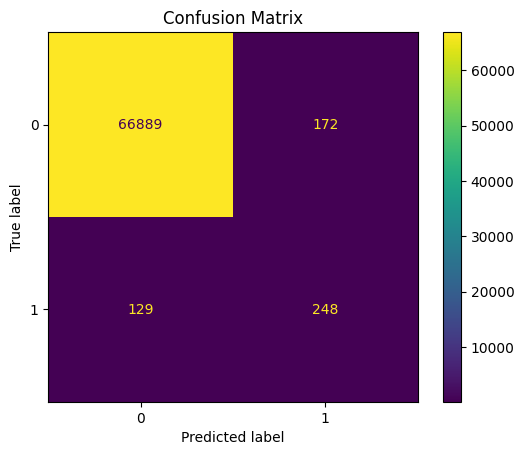

******************************************************************************************



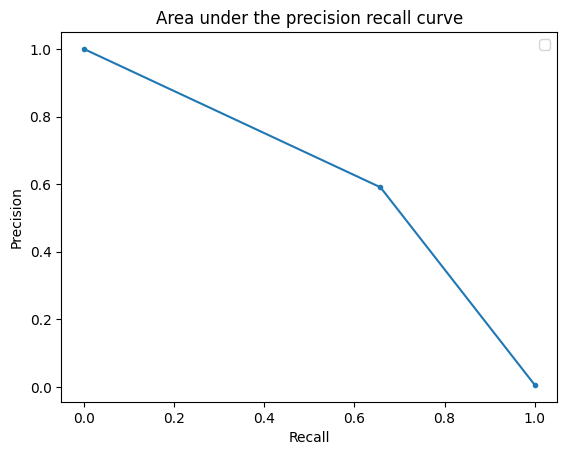

******************************************************************************************

Area under the precision recall curve 0.6251069961395462


In [35]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predictions on test set
dt_preds = dt_model.predict(X_test)

# Classification report for Decision Tree model
performance_metrics("DecisionTreeClassifier",y_test,dt_preds,dt_model)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67061
           1       0.98      0.32      0.48       377

    accuracy                           1.00     67438
   macro avg       0.99      0.66      0.74     67438
weighted avg       1.00      1.00      1.00     67438

******************************************************************************************

                      Balanced Accuracy  Precision    Recall        F1
KNeighborsClassifier           0.659136   0.983607  0.318302  0.480962
******************************************************************************************



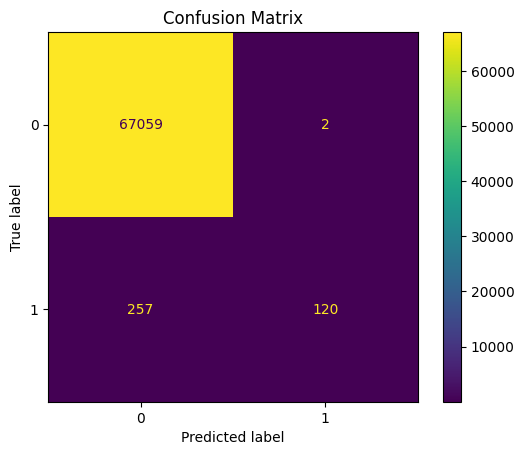

******************************************************************************************



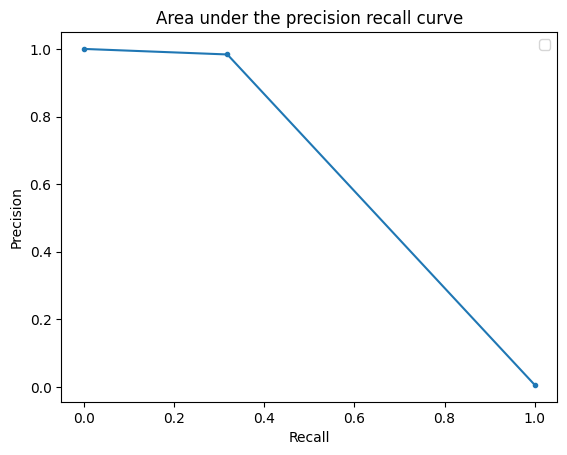

******************************************************************************************

Area under the precision recall curve 0.6528599262208724


In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
performance_metrics("KNeighborsClassifier",y_test,y_pred,knn)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67061
           1       0.98      0.42      0.59       377

    accuracy                           1.00     67438
   macro avg       0.99      0.71      0.79     67438
weighted avg       1.00      1.00      1.00     67438

******************************************************************************************

                        Balanced Accuracy  Precision    Recall        F1
Support Vector Machine           0.709527   0.981366  0.419098  0.587361
******************************************************************************************



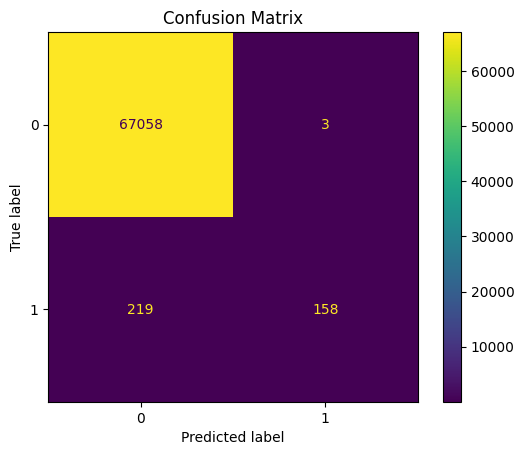

******************************************************************************************



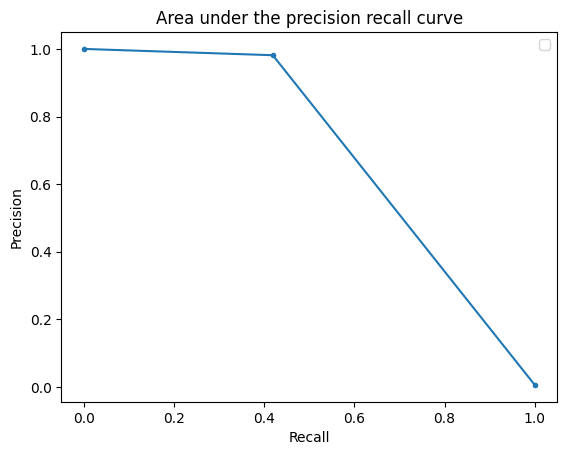

******************************************************************************************

Area under the precision recall curve 0.7018560150649649


In [46]:
from sklearn.svm  import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
performance_metrics("Support Vector Machine",y_test,y_pred,svm)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67061
           1       0.89      0.54      0.67       377

    accuracy                           1.00     67438
   macro avg       0.94      0.77      0.83     67438
weighted avg       1.00      1.00      1.00     67438

******************************************************************************************

                     Balanced Accuracy  Precision    Recall        F1
Logistic Regression           0.767711   0.885965  0.535809  0.667769
******************************************************************************************



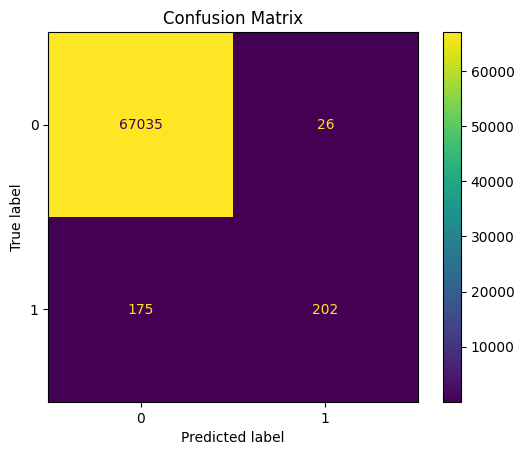

******************************************************************************************



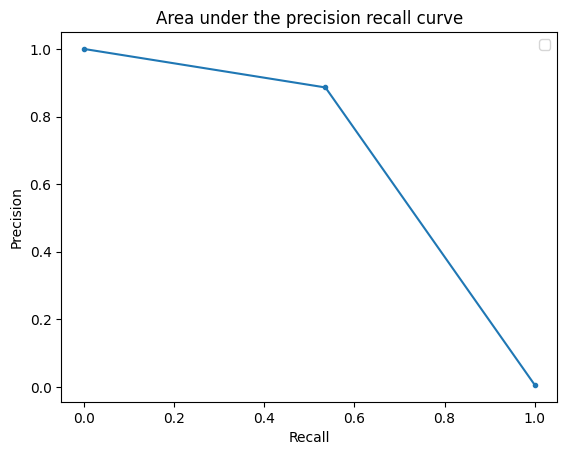

******************************************************************************************

Area under the precision recall curve 0.7121844534872803


In [32]:
from sklearn.linear_model import LogisticRegression
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
performance_metrics("Logistic Regression",y_test,y_pred,model)

In [33]:
#from sklearn.metrics import classification_report


# Predictions on test set for Logistic Regression

# Classification report for Logistic Regression model
#logistic_report = classification_report(y_test, logistic_preds)
##print("Logistic Regression Classification Report:")
#print(logistic_report)

     1)Accuracy provides the proportion of correctly classified
      instances.
     2)Precision: Precision focuses on the accuracy of positive
      predictions made by the model.{{TP / (TP + FP)} }
     3)Recall measures the ratio of No.of times model correctly
     predicted positive instances among all actual positive instances. {TP / (TP + FN)} --> True Positive Rate/Sensitivity --> It describes how good the model is at predicting the positive class when the actual outcome is positive.
     4)F1 score is the harmonic mean of precision & recall.
     5)ROC Curve is False Positive Rate(false alarm rate) vs True Positive Rate(hit rate)
     6)False Positive Rate = {FP/ (FP+TN)} --> It describes how often a positive class is predicted when the actual outcome is negative.
     7)ROC Graph Summarizes all of the confusion matrices that each threshold produces.It makes easy to identify best threshold.
     Higher the AUROC ,better the model is.
     8)A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67061
           1       0.85      0.59      0.69       377

    accuracy                           1.00     67438
   macro avg       0.92      0.79      0.85     67438
weighted avg       1.00      1.00      1.00     67438

******************************************************************************************

         Balanced Accuracy  Precision    Recall        F1
XGBoost           0.794131   0.847328  0.588859  0.694836
******************************************************************************************



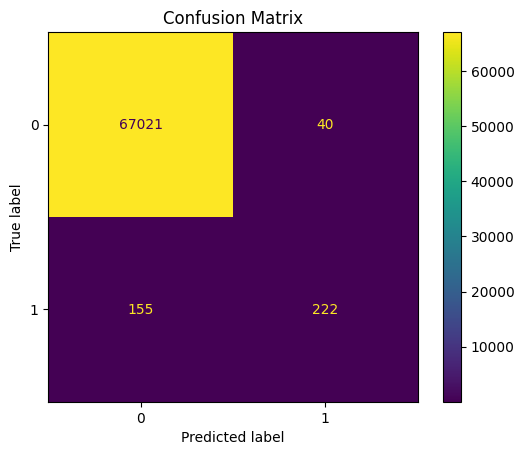

******************************************************************************************



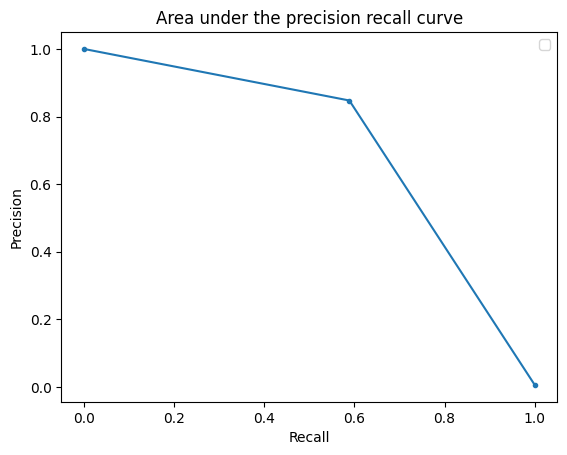

******************************************************************************************

Area under the precision recall curve 0.7192430340732564


In [36]:
import xgboost as xgb
# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)

performance_metrics("XGBoost",y_test,xgb_preds,xgb_model)

<ipython-input-47-ce35cb78495d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67061
           1       0.97      0.49      0.65       377

    accuracy                           1.00     67438
   macro avg       0.98      0.74      0.82     67438
weighted avg       1.00      1.00      1.00     67438

******************************************************************************************

                        Balanced Accuracy  Precision    Recall        F1
RandomForestClassifier           0.742661   0.968254  0.485411  0.646643
******************************************************************************************



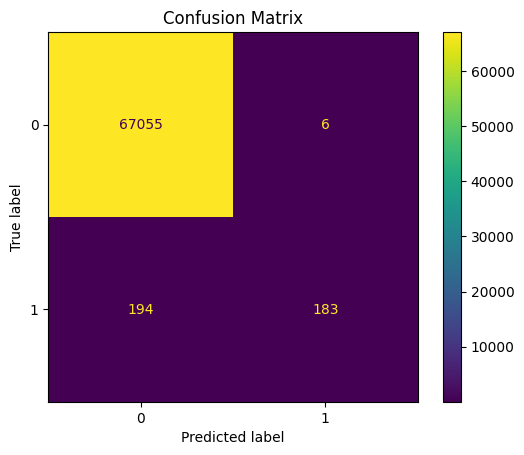

******************************************************************************************



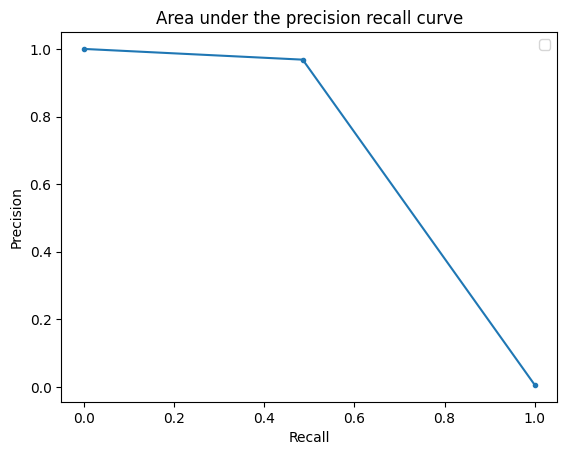

******************************************************************************************

Area under the precision recall curve 0.7282709126144373


In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
performance_metrics("RandomForestClassifier",y_test,y_pred,rf)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67061
           1       0.94      0.59      0.73       377

    accuracy                           1.00     67438
   macro avg       0.97      0.80      0.86     67438
weighted avg       1.00      1.00      1.00     67438

******************************************************************************************

                            Balanced Accuracy  Precision    Recall        F1
GradientBoostingClassifier           0.795659   0.944915  0.591512  0.727569
******************************************************************************************



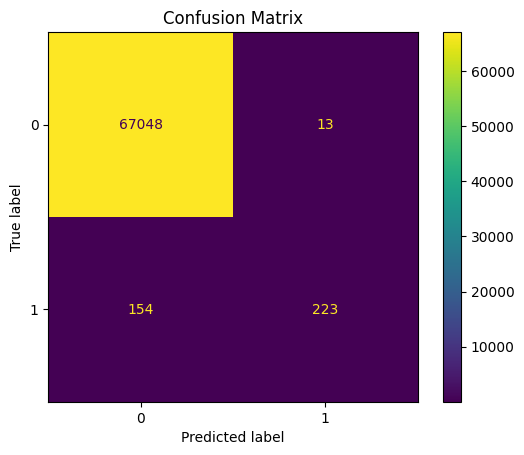

******************************************************************************************



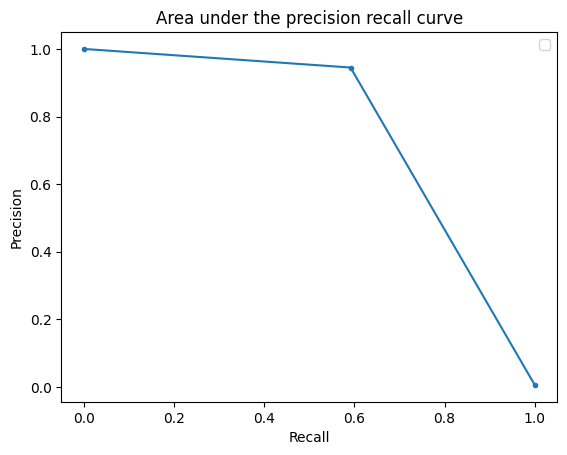

******************************************************************************************

Area under the precision recall curve 0.769355384783942


In [37]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)

# Predictions on test set
gbm_preds = gbm_model.predict(X_test)

performance_metrics("GradientBoostingClassifier",y_test,gbm_preds,gbm_model)

In [44]:
feature_importances = gbm_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': col,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print(feature_importance_df)

                                      Feature    Importance
9                           balanceChangeDest  3.504053e-01
8                           balanceChangeOrig  3.219483e-01
0                           transactionAmount  2.695455e-01
3   OriginStudentNumberOfTransactionsTillDate  5.113608e-02
4                              DestStudentAge  1.860421e-03
6     DestStudentNumberOfTransactionsTillDate  1.129779e-03
29          DestStudentAccountType_INDIVIDUAL  1.088884e-03
14             comments_Done at super market.  8.163025e-04
30        DestStudentAccountType_JOINT/SHARED  8.161957e-04
24                             comments_lunch  3.930444e-04
7                           isSuspectedHacker  3.619640e-04
1                            OriginStudentAge  3.243921e-04
22                      comments_laundry rent  1.725330e-04
11                   transaction_device_Check  9.156208e-07
10                transaction_device_ATM card  2.872285e-07
2           OriginStudentTransactionFreq